In [1]:
pip install py_mesa_reader-master.zip

Processing ./py_mesa_reader-master.zip
  Preparing metadata (setup.py) ... done
  Created wheel for mesa-reader: filename=mesa_reader-0.3.0-py3-none-any.whl size=10403 sha256=a9cfc8d4769da4444162236c161540d684e430d399d23fd0eca5d5880f0cffdd
  Stored in directory: /home/elainaplonis/.cache/pip/wheels/08/66/0e/d64316f98a36c54e2ae4c0a4e9301061fdab769cc4a6562b85
Successfully built mesa-reader
  Attempting uninstall: mesa-reader
    Found existing installation: mesa-reader 0.3.0
    Uninstalling mesa-reader-0.3.0:
      Successfully uninstalled mesa-reader-0.3.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
## Imports and setup

from os.path import join, abspath, dirname

import numpy as np
import matplotlib.pyplot as plt

import mesa_reader as mr
from composition_blend import blend_comps, make_composition_file
plt.style.use('custom.mplstyle')

WOLF_MODELS_DIR = abspath(join('.', 'wolf_2013_models'))
model_1p0 = mr.MesaData(join(WOLF_MODELS_DIR, '1.0Msun_Tc_3e7_init.mod'))
model_1p3 = mr.MesaData(join(WOLF_MODELS_DIR, '1.3Msun_Tc_3e7_init.mod'))

def texify(iso):
    "Create a TeX-friendly version of an isotope string."
    element = ''.join([i for i in iso if not i.isdigit()])
    mass_number = ''.join([i for i in iso if i.isdigit()])
    return r"$^{" + str(mass_number) + r"}\mathrm{" + f"{element.title()}" + r"}$"
    

# Building a 0.60 $M_\odot$ CO WD
First, let's visualize the composition of the existing 0.60 $M_\odot$ CO WD model from Wolf et al. 2013.

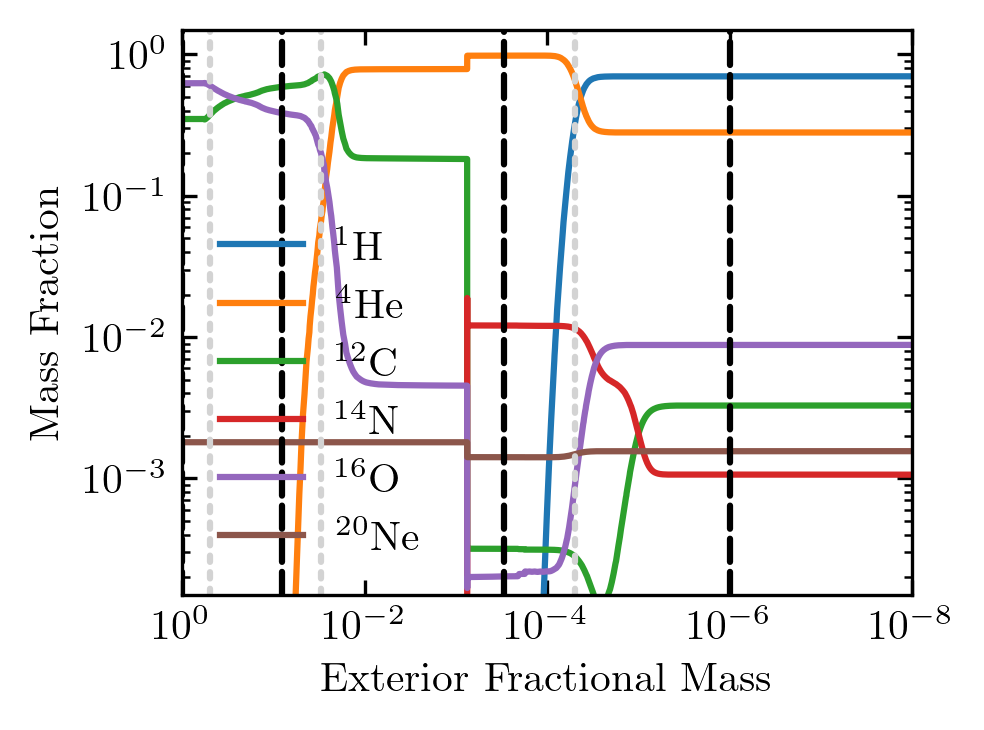

In [4]:
m = mr.MesaData('wolf_2013_models/0.6Msun_Tc_3e7_init.mod')
xqs = np.cumsum(m.dq)
for iso in ['h1', 'he4', 'c12', 'n14', 'o16', 'ne20']:
    plt.loglog(xqs, m.data(iso), label=texify(iso))
plt.legend(loc='best')
plt.xlim(1, 1e-8)
plt.ylim(1.5e-4, 1.5)
plt.xlabel(r"Exterior Fractional Mass")
plt.ylabel(r"Mass Fraction")

# show vertical dashed lines at some sample locations
sample_xqs = [1, 8e-2, 3e-4, 1e-6]
boundary_xqs = [5e-1, 3e-2, 5e-5]
for xq in sample_xqs:
    plt.axvline(xq, ls='--', color='k')
for xq in boundary_xqs:
    plt.axvline(xq, ls=':', color='lightgray')

samples = {'inner_core': sample_xqs[0], 'outer_core': sample_xqs[1],
           'helium_shell':sample_xqs[2], 'hydrogen_shell': sample_xqs[3]}
boundaries = {'inner_core': boundary_xqs[0], 'outer_core': boundary_xqs[1],
              'helium_core': boundary_xqs[2]}

Now we've marked where we'll extract the compositions from. We'll extract the surface, the middle of the He layer, the middle of the outer core, and the center of the inner core. We'll then build up the composition array and write it to a file.

In [11]:
# extract composition at each sample location
isos = m.bulk_names[m.bulk_names.index('h1'):]
print(isos)
dt = np.dtype([(iso, float) for iso in isos])
comps = []
for xq in sorted(sample_xqs):
    this_comp = np.zeros(1, dtype=dt)
    idx = np.argmin(np.abs(xqs - xq))
    for iso in isos:
        this_comp[iso] = m.data(iso)[idx]
    comps.append(this_comp)

# blend the compositions
blend = blend_comps(comps[0], [(boundaries['helium_core'], 0, comps[1]),
                                (boundaries['outer_core'], 0, comps[2]),
                                (boundaries['inner_core'], 0, comps[3])])
# make_composition_file(blend, m.header('net_name'), 'M0p60_CO_WD.data')

['h1', 'he3', 'he4', 'c12', 'c13', 'n13', 'n14', 'n15', 'o14', 'o15', 'o16', 'o17', 'o18', 'f17', 'f18', 'f19', 'ne18', 'ne19', 'ne20', 'ne22', 'mg22', 'mg24', 'mg26', 'fe56']


# Building a 1.34 $M_\odot$ ONe WD
First, let's visualize the composition of the existing 1.34 $M_\odot$ ONe WD model from Wolf et al. 2013.

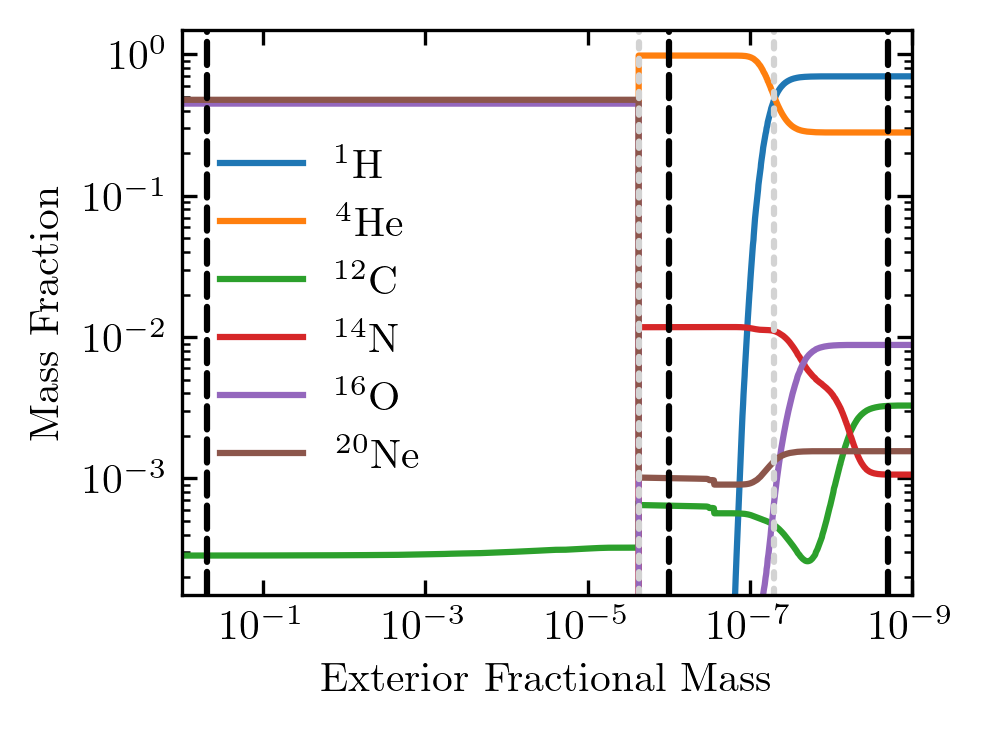

In [6]:
m = mr.MesaData('wolf_2013_models/1.34Msun_Tc_3e7_init.mod')
xqs = np.cumsum(m.dq)
for iso in ['h1', 'he4', 'c12', 'n14', 'o16', 'ne20']:
    plt.loglog(xqs, m.data(iso), label=texify(iso))
plt.legend(loc='best')
plt.xlim(1, 1e-9)
plt.ylim(1.5e-4, 1.5)
plt.xlabel(r"Exterior Fractional Mass")
plt.ylabel(r"Mass Fraction")

# show vertical dashed lines at some sample locations
sample_xqs = [0.5, 1e-6, 2e-9]
boundary_xqs = [2.3e-6, 5e-8]
for xq in sample_xqs:
    plt.axvline(xq, ls='--', color='k')
for xq in boundary_xqs:
    plt.axvline(xq, ls=':', color='lightgray')

# only three zones for this one; no clear inner core/outer core boundaries
samples = {'core': sample_xqs[0], 'helium_shell': sample_xqs[1], 
           'hydrogen_shell': sample_xqs[2]}
boundaries = {'core': boundary_xqs[0], 'helium_core': boundary_xqs[1]}

Now we've marked where we'll extract the compositions from. We'll extract the surface, the middle of the He layer, the middle of the outer core, and the center of the inner core. We'll then build up the composition array and write it to a file.

In [7]:
# extract composition at each sample location
isos = m.bulk_names[m.bulk_names.index('h1'):]
print(isos)
dt = np.dtype([(iso, float) for iso in isos])
comps = []
for xq in sorted(sample_xqs):
    this_comp = np.zeros(1, dtype=dt)
    idx = np.argmin(np.abs(xqs - xq))
    for iso in isos:
        this_comp[iso] = m.data(iso)[idx]
    comps.append(this_comp)

# blend the compositions
blend = blend_comps(comps[0], [(boundaries['helium_core'], 0, comps[1]),
                                (boundaries['core'], 0, comps[2])])
                                # (boundaries['inner_core'], 0, comps[3])])
# make_composition_file(blend, m.header('net_name'), 'M1p34_ONe_WD.data')

['h1', 'he3', 'he4', 'c12', 'c13', 'n13', 'n14', 'n15', 'o14', 'o15', 'o16', 'o17', 'o18', 'f17', 'f18', 'f19', 'ne18', 'ne19', 'ne20', 'ne22', 'mg22', 'mg24', 'mg26', 'fe56']


# Building a 1.20 $M_\odot$ CO WD
First, let's visualize the composition of the existing 1.20 $M_\odot$ CO WD model from Wolf et al. 2013.

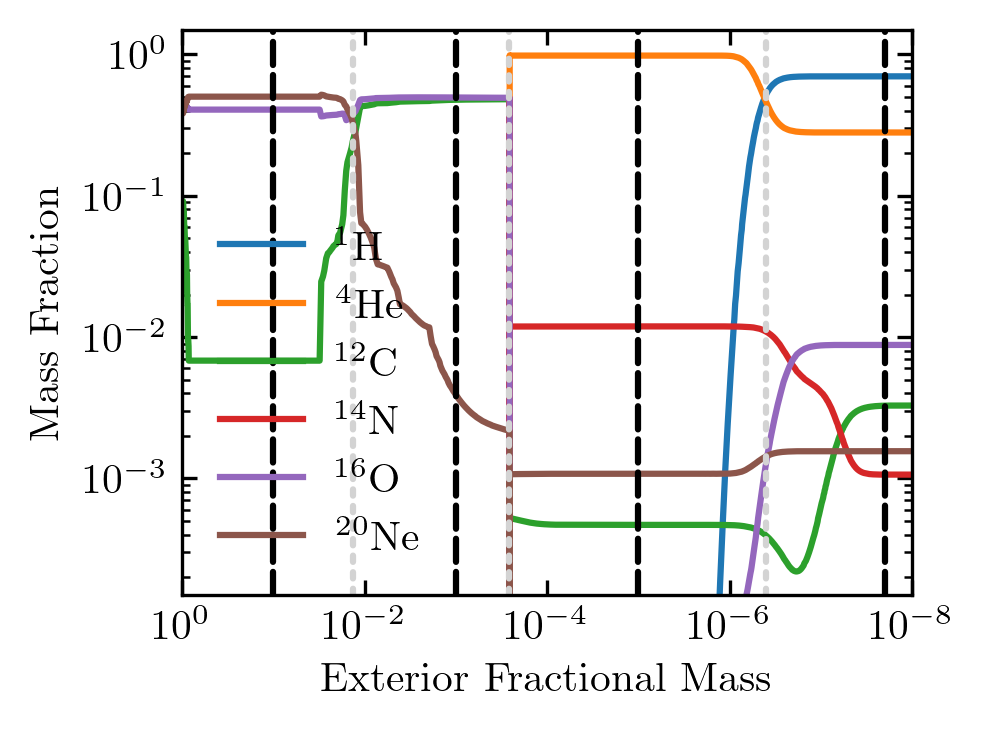

In [9]:
m = mr.MesaData('wolf_2013_models/1.2Msun_Tc_3e7_init.mod')
xqs = np.cumsum(m.dq)
for iso in ['h1', 'he4', 'c12', 'n14', 'o16', 'ne20']:
    plt.loglog(xqs, m.data(iso), label=texify(iso))
plt.legend(loc='best')
plt.xlim(1, 1e-8)
plt.ylim(1.5e-4, 1.5)
plt.xlabel(r"Exterior Fractional Mass")
plt.ylabel(r"Mass Fraction")

# show vertical dashed lines at some sample locations
sample_xqs = [1e-1, 1e-3, 1e-5, 2e-8]
boundary_xqs = [1.35e-2, 2.6e-4, 4e-7]
for xq in sample_xqs:
    plt.axvline(xq, ls='--', color='k')
for xq in boundary_xqs:
    plt.axvline(xq, ls=':', color='lightgray')

samples = {'inner_core': sample_xqs[0], 'outer_core': sample_xqs[1],
           'helium_shell':sample_xqs[2], 'hydrogen_shell': sample_xqs[3]}
boundaries = {'inner_core': boundary_xqs[0], 'outer_core': boundary_xqs[1],
              'helium_core': boundary_xqs[2]}

Now we've marked where we'll extract the compositions from. We'll extract the surface, the middle of the He layer, the middle of the outer core, and the center of the inner core. We'll then build up the composition array and write it to a file.

In [10]:
# extract composition at each sample location
isos = m.bulk_names[m.bulk_names.index('h1'):]
print(isos)
dt = np.dtype([(iso, float) for iso in isos])
comps = []
for xq in sorted(sample_xqs):
    this_comp = np.zeros(1, dtype=dt)
    idx = np.argmin(np.abs(xqs - xq))
    for iso in isos:
        this_comp[iso] = m.data(iso)[idx]
    comps.append(this_comp)

# blend the compositions
blend = blend_comps(comps[0], [(boundaries['helium_core'], 0, comps[1]),
                                (boundaries['outer_core'], 0, comps[2]),
                                (boundaries['inner_core'], 0, comps[3])])
# make_composition_file(blend, m.header('net_name'), 'M1p20_CO_WD.data')

['h1', 'he3', 'he4', 'c12', 'c13', 'n13', 'n14', 'n15', 'o14', 'o15', 'o16', 'o17', 'o18', 'f17', 'f18', 'f19', 'ne18', 'ne19', 'ne20', 'ne22', 'mg22', 'mg24', 'mg26', 'fe56']
